<a href="https://colab.research.google.com/github/Sam-415/Marketing-research-methods---Samhita_-Jio-Institute/blob/FinalQuiz/FinalQuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Room Type Distribution:
Entire home/apt: 57.67%
Private room: 39.81%
Shared room: 1.68%
Hotel room: 0.85%


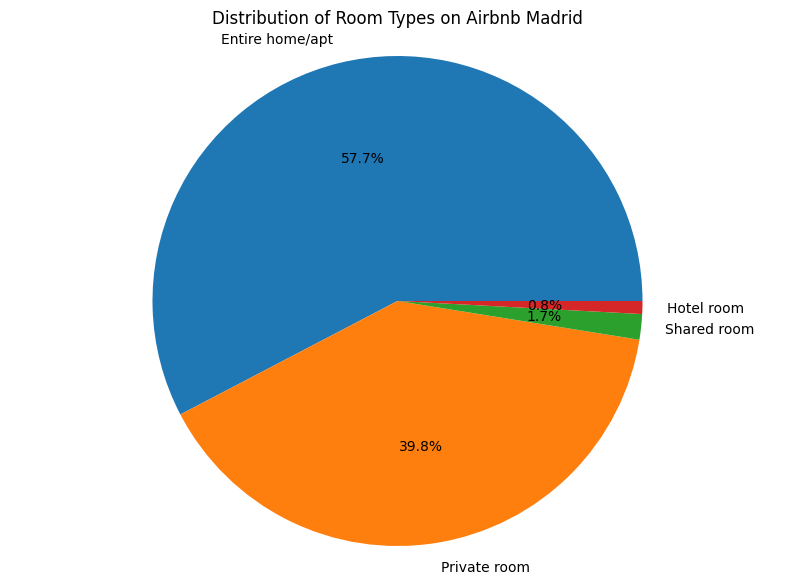

In [2]:
#question 1
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
# Convert the text data to a DataFrame
data = pd.read_csv('/content/listings_detailed.csv')

# Analyze room types
room_type_dist = data['room_type'].value_counts()
total_listings = len(data)

# Calculate percentages
room_type_percentages = (room_type_dist / total_listings * 100).round(2)

print("Room Type Distribution:")
for room_type, percentage in room_type_percentages.items():
    print(f"{room_type}: {percentage}%")

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(room_type_percentages, labels=room_type_percentages.index, autopct='%1.1f%%')
plt.title('Distribution of Room Types on Airbnb Madrid')
plt.axis('equal')
plt.show()

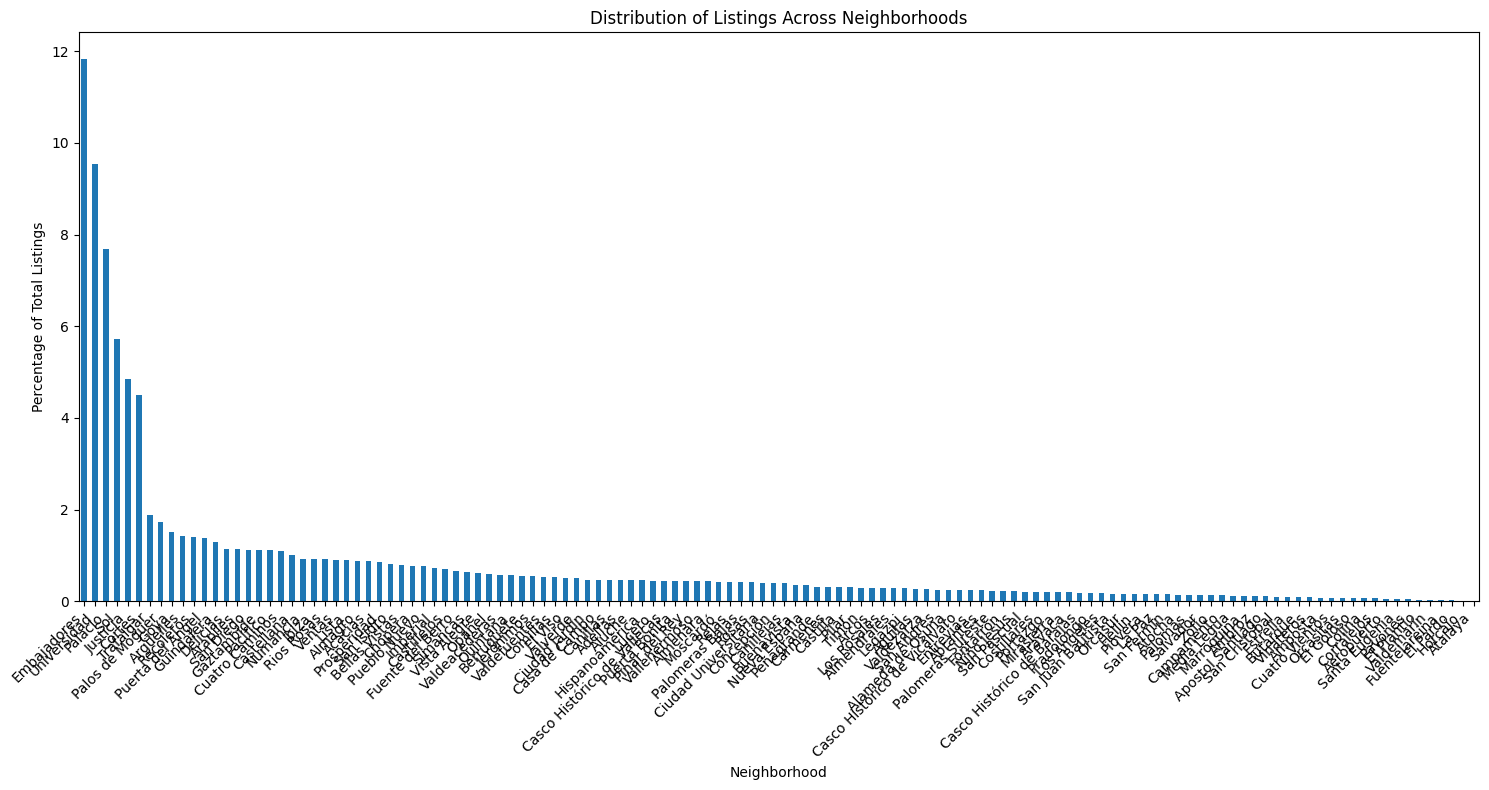


Top 5 'Hot' Neighborhoods:
1. Embajadores: 11.82%
2. Universidad: 9.53%
3. Palacio: 7.68%
4. Sol: 5.73%
5. Justicia: 4.85%


In [3]:
#question 2
import pandas as pd
import matplotlib.pyplot as plt

# Analyze neighborhood distribution
neighborhood_dist = data['neighbourhood_cleansed'].value_counts()

# Calculate percentages
neighborhood_percentages = (neighborhood_dist / len(data) * 100).round(2)

# Create a bar plot
plt.figure(figsize=(15, 8))
neighborhood_percentages.plot(kind='bar')
plt.title('Distribution of Listings Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Percentage of Total Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print top 5 neighborhoods
print("\nTop 5 'Hot' Neighborhoods:")
for idx, (neighborhood, percentage) in enumerate(neighborhood_percentages.head().items(), 1):
    print(f"{idx}. {neighborhood}: {percentage}%")

In [5]:
# question 3
import pandas as pd

# Analyze host listings distribution
host_listings = data.groupby('host_id')['id'].count().sort_values(ascending=False)

# Calculate statistics
total_hosts = len(host_listings)
multiple_property_hosts = len(host_listings[host_listings > 1])
percentage_multiple = round((multiple_property_hosts / total_hosts * 100), 2)

print(f"\nHost Property Analysis:")
print(f"Total number of hosts: {total_hosts}")
print(f"Hosts with multiple properties: {multiple_property_hosts} ({percentage_multiple}%)")

# Show top 5 hosts by number of properties
print("\nTop 5 hosts by number of properties:")
top_hosts = host_listings.head()
for idx, (host_id, count) in enumerate(top_hosts.items(), 1):
    host_info = data[data['host_id'] == host_id][['host_name', 'host_id']].iloc[0]
    print(f"{idx}. Host ID: {host_info['host_id']} (Name: {host_info['host_name']}) - {count} properties")

# Additional analysis of property distribution
print("\nDistribution of properties per host:")
property_counts = host_listings.value_counts().sort_index()
for num_properties, count in property_counts.items():
    print(f"Hosts with {num_properties} property/properties: {count}")


Host Property Analysis:
Total number of hosts: 11325
Hosts with multiple properties: 2480 (21.9%)

Top 5 hosts by number of properties:
1. Host ID: 377605855 (Name: Marco) - 163 properties
2. Host ID: 28038703 (Name: Luxury Rentals Madrid) - 113 properties
3. Host ID: 102196656 (Name: Gabriel) - 101 properties
4. Host ID: 276565844 (Name: Enrique) - 101 properties
5. Host ID: 32046323 (Name: Ivory) - 92 properties

Distribution of properties per host:
Hosts with 1 property/properties: 8845
Hosts with 2 property/properties: 1320
Hosts with 3 property/properties: 460
Hosts with 4 property/properties: 217
Hosts with 5 property/properties: 112
Hosts with 6 property/properties: 72
Hosts with 7 property/properties: 57
Hosts with 8 property/properties: 50
Hosts with 9 property/properties: 25
Hosts with 10 property/properties: 24
Hosts with 11 property/properties: 15
Hosts with 12 property/properties: 19
Hosts with 13 property/properties: 7
Hosts with 14 property/properties: 7
Hosts with 15 p

In [2]:
#question 4
import pandas as pd
import re
from langdetect import detect

# Load the dataset
file_path = "/content/listings_detailed.csv"
data = pd.read_csv(file_path)

# Function to clean and convert price column
def clean_price(price):
    match = re.findall(r'\d+\.\d+', str(price))  # Extract numeric values
    return float(match[0]) if match else None  # Take the first valid number

# Convert price column to numeric once
data['price'] = data['price'].apply(clean_price)

# Sample a subset of data (for faster language detection) if the dataset is large
data_sample = data[['description']].dropna().sample(frac=0.1, random_state=42)

# Perform language detection on the subset sample to get language distribution
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return 'unknown'

# Apply language detection
data_sample['language'] = data_sample['description'].apply(detect_language)

# Merge the language detection result with the original data
data = pd.merge(data, data_sample[['description', 'language']], on='description', how='left')

# Filter out only English and Spanish listings
filtered_data = data[data['language'].isin(['en', 'es'])]

# Calculate average prices for English vs Spanish listings
price_comparison = filtered_data.groupby('language')['price'].agg(['mean', 'count'])

# Check if the difference is stronger in certain districts
if 'neighbourhood_cleansed' in data.columns:
    price_by_neighborhood = filtered_data.groupby(['neighbourhood_cleansed', 'language'])['price'].mean().unstack()
else:
    price_by_neighborhood = None

# Save the output to CSV files
price_comparison.to_csv("/content/price_comparison.csv")

if price_by_neighborhood is not None:
    price_by_neighborhood.to_csv("/content/price_by_neighborhood.csv")

print("Results saved to CSV files: price_comparison.csv and price_by_neighborhood.csv")

Results saved to CSV files: price_comparison.csv and price_by_neighborhood.csv


In [3]:
#question 5
from scipy import stats

# Create a correlation matrix for numerical variables
variables = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
correlation_matrix = data[variables].corr()

print("\nCorrelation with price:")
for var in variables[1:]:
    correlation = correlation_matrix.loc['price', var]
    print(f"{var}: {correlation:.3f}")

# Compare prices for verified vs non-verified hosts
verified_prices = data[data['host_identity_verified'] == 't']['price']
non_verified_prices = data[data['host_identity_verified'] == 'f']['price']

t_stat, p_value = stats.ttest_ind(verified_prices, non_verified_prices)
print(f"\nVerified vs Non-verified Host Price Comparison:")
print(f"Average price for verified hosts: ${verified_prices.mean():.2f}")
print(f"Average price for non-verified hosts: ${non_verified_prices.mean():.2f}")
print(f"P-value: {p_value:.4f}")


Correlation with price:
accommodates: 0.313
bathrooms: nan
bedrooms: 0.296
beds: 0.187
review_scores_rating: 0.033

Verified vs Non-verified Host Price Comparison:
Average price for verified hosts: $87.51
Average price for non-verified hosts: $98.19
P-value: 0.0000


In [6]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=6c9753446cc5850c12d97d234ed81deae250948f3429d302d9e02f7bd41d5f1b
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
